In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\Zac\BME574`


In [2]:
Pkg.instantiate()

In [3]:
using Distributions, Random, LinearAlgebra, Plots, Statistics

In [4]:
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

In [5]:
data = rand(nd,(1000,2))

1000×2 Matrix{Float64}:
  0.679418    -1.24516
 -0.841063     0.248071
 -0.362933     0.0313838
 -1.33618      0.404792
 -1.98668      0.470725
  0.485585    -1.81899
 -0.575901     0.298619
  0.184392    -0.0284511
  1.37007      0.471519
 -0.356041     0.789364
 -0.00062288  -1.15314
  0.715942     0.218551
  0.982098    -0.222763
  ⋮           
 -1.04612     -2.00643
 -1.5319       0.136734
  0.774808     1.16323
 -0.173874     0.410715
 -0.723662     1.83889
  1.06436      0.966823
 -0.733269    -0.707384
  0.408318    -0.101355
  0.500031     0.0193875
 -0.429969    -1.11182
  0.524459    -0.452278
 -0.479126     1.77005

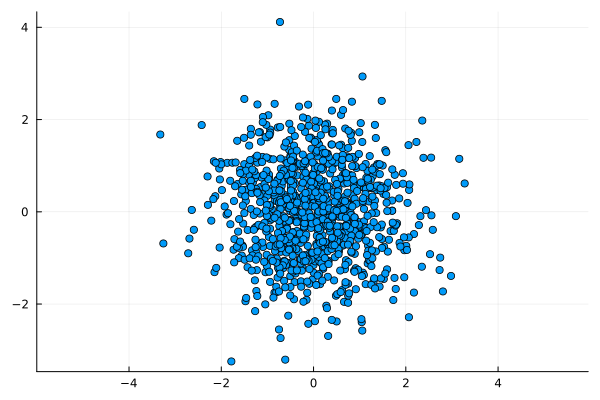

In [6]:
scatter(data[:,1],data[:,2], aspect_ratio = :equal, legend = nothing )

In [7]:
data[1,:]

2-element Vector{Float64}:
  0.6794183994455366
 -1.2451553902548627

In [8]:
datas = copy(data)
datas[:,2] = datas[:,2]*3

1000-element Vector{Float64}:
 -3.735466170764588
  0.744214366525217
  0.09415154682466853
  1.214375227237404
  1.4121757148819958
 -5.456956698914231
  0.8958576411736396
 -0.08535317166667455
  1.4145579399735106
  2.3680912244216428
 -3.4594331611192466
  0.6556534616925747
 -0.668290077630756
  ⋮
 -6.019299224479489
  0.4102005540066197
  3.4896924189162926
  1.2321443121082942
  5.516655470591988
  2.9004697941932607
 -2.1221527639366586
 -0.3040656305743268
  0.05816237945369493
 -3.335455761080137
 -1.3568339114020826
  5.310144515959021

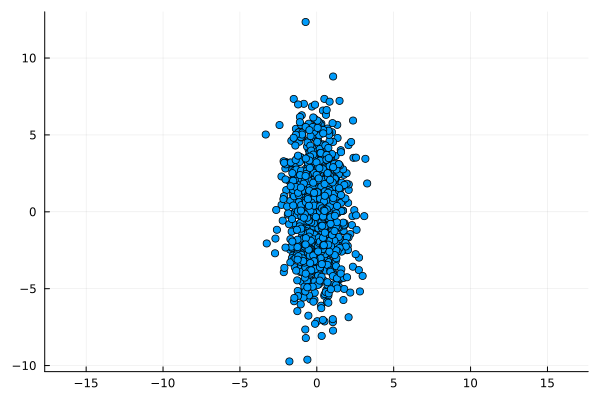

In [9]:
scatter(datas[:,1],datas[:,2], aspect_ratio = :equal, legend = nothing )

In [10]:
θ = π/4

0.7853981633974483

In [11]:
r = [[cos(θ), -sin(θ)] [sin(θ), cos(θ)]] 

2×2 Matrix{Float64}:
  0.707107  0.707107
 -0.707107  0.707107

In [12]:
datar = datas * r

1000×2 Matrix{Float64}:
  3.12179    -2.16095
 -1.12096    -0.0684827
 -0.323208   -0.190057
 -1.80351    -0.086126
 -2.40336    -0.406238
  4.20201    -3.51529
 -1.04069     0.226243
  0.190739    0.0700311
 -0.0314597   1.96903
 -1.92625     1.42273
  2.44575    -2.44663
  0.0426306   0.969865
  1.167       0.221896
  ⋮          
  3.51657    -4.99601
 -1.37327    -0.793164
 -1.91971     3.01546
 -0.994205    0.74831
 -4.41257     3.38916
 -1.29833     2.80356
  0.982089   -2.01909
  0.503731    0.0737175
  0.312448    0.394702
  2.05449    -2.66256
  1.33028    -0.588578
 -4.09363     3.41605

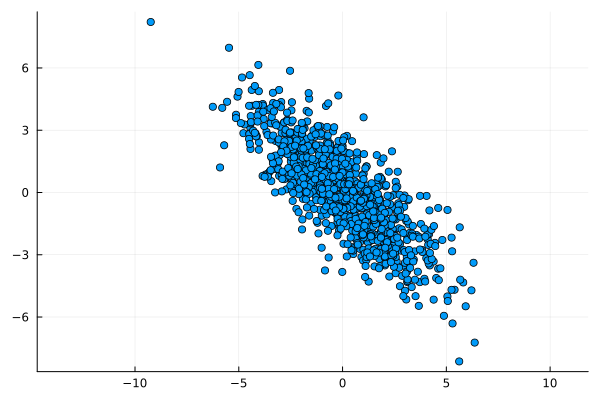

In [13]:
scatter(datar[:,1],datar[:,2], aspect_ratio = :equal, legend = nothing )

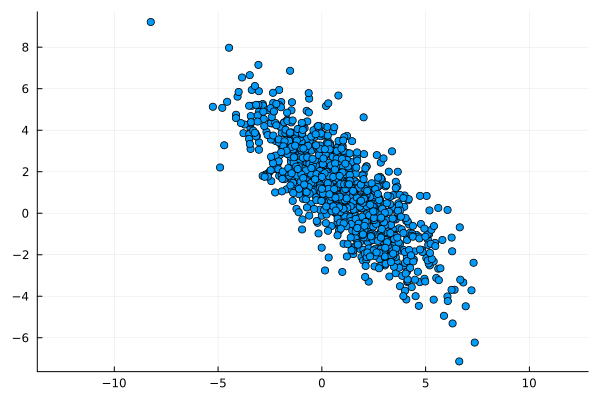

In [14]:
datat = datar .+ [1 1]
scatter(datat[:,1],datat[:,2], aspect_ratio = :equal, legend = nothing )

In [15]:
datamean = mean(datat,dims=1)

1×2 Matrix{Float64}:
 0.981433  1.04653

In [17]:
u,s,v = svd(datac/sqrt(size(datac,1)))

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
1000×2 Matrix{Float64}:
 -0.0401685     0.0188421
  0.00754747   -0.0268308
  0.000577554  -0.012067
  0.012615     -0.0422263
  0.0148254    -0.0626759
 -0.0583672     0.0118065
  0.00910656   -0.0183721
 -0.00142074    0.00513204
  0.0142552     0.0433901
  0.0246606    -0.010646
 -0.0371243    -0.00249941
  0.0063333     0.0223198
 -0.00773638    0.0300291
  ⋮            
 -0.0640516    -0.0368892
  0.00413232   -0.0488363
  0.0363394     0.0256795
  0.012597     -0.00549107
  0.0580737    -0.0205958
  0.0300474     0.0345167
 -0.0228306    -0.0249415
 -0.00377694    0.0120918
  4.33072e-5    0.0151814
 -0.0357351    -0.016
 -0.0149479     0.0152045
  0.0558431    -0.0129783
singular values:
2-element Vector{Float64}:
 2.98527147829241
 1.000661271804644
Vt factor:
2×2 Matrix{Float64}:
 -0.718848  0.695167
  0.695167  0.718848

In [18]:
v * r

2×2 Matrix{Float64}:
 -0.99986    -0.0167448
 -0.0167448   0.99986

In [19]:
#pcdirs = v' #unit vectors
pcdirs = Diagonal(s)*v' # Scaled by variances


2×2 Matrix{Float64}:
 -2.14596   2.07526
  0.695627  0.719323

In [20]:
θ = (0:0.01:1)*2π
onestd = [cos.(θ) sin.(θ)] * pcdirs # create unit-circle and transform

101×2 Matrix{Float64}:
 -2.14596  2.07526
 -2.09804  2.11633
 -2.04185  2.14905
 -1.9776   2.17329
 -1.90554  2.18895
 -1.82597  2.19598
 -1.73918  2.19433
 -1.64554  2.18403
 -1.5454   2.1651
 -1.43916  2.13764
 -1.32724  2.10173
 -1.21008  2.05753
 -1.08815  2.00521
  ⋮        
 -2.0969   1.1405
 -2.14499  1.25612
 -2.18463  1.36677
 -2.21564  1.47203
 -2.2379   1.57148
 -2.25134  1.66473
 -2.25589  1.75141
 -2.25153  1.83118
 -2.23829  1.90372
 -2.21622  1.96874
 -2.1854   2.026
 -2.14596  2.07526

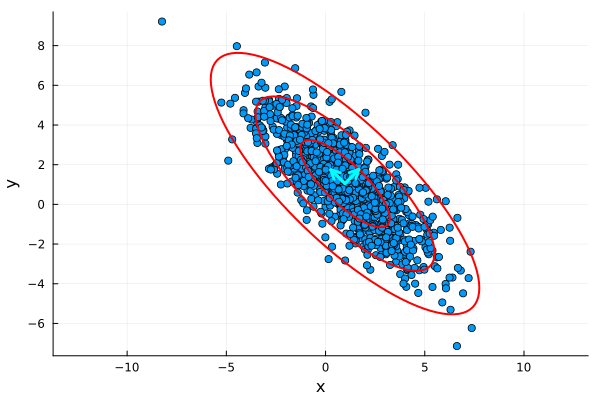

In [21]:
p = scatter(datat[:,1],datat[:,2], aspect_ratio = :equal, legend = nothing )
xlabel!(p,"x")
ylabel!(p,"y")

#Standard deviations
plot!(p, datamean[:,1] .+ 1onestd[:,1],datamean[:,2] .+ 1onestd[:,2], lc=:red, lw=2)
plot!(p, datamean[:,1] .+ 2onestd[:,1],datamean[:,2] .+ 2onestd[:,2], lc=:red, lw=2)
plot!(p, datamean[:,1] .+ 3onestd[:,1],datamean[:,2] .+ 3onestd[:,2], lc=:red, lw=2)

#PC directions (scaled)
#plot!(p, datamean[:,1] .+ [0; pcdirs[1,1]],datamean[:,2] .+ [0; pcdirs[1,2]], lc=:cyan, lw=3, arrow=true)
#plot!(p, datamean[:,1] .+ [0; pcdirs[2,1]],datamean[:,2] .+ [0; pcdirs[2,2]], lc=:cyan, lw=3, arrow=true)

#PC directions (unit)
plot!(p, datamean[:,1] .+ [0; v[1,1]],datamean[:,2] .+ [0; v[2,1]], lc=:cyan, lw=3, arrow=true)
plot!(p, datamean[:,1] .+ [0; v[1,2]],datamean[:,2] .+ [0; v[2,2]], lc=:cyan, lw=3, arrow=true)
